In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving glass.csv to glass.csv


In [3]:
glass = pd.read_csv('glass.csv')
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [8]:
x = glass.iloc[:,:-1]
y = glass.iloc[:,-1]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

### K-Neighbors Classifier with Tuning

In [12]:
knn = KNeighborsClassifier()
param_grid = dict(n_neighbors = range(1,11))

In [13]:
model = GridSearchCV(knn, param_grid, refit = True, verbose = 3)

In [14]:
model.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.633 total time=   0.0s
[CV 2/5] END .....................n_neighbors=1;, score=0.700 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.733 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.767 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.690 total time=   0.0s
[CV 1/5] END .....................n_neighbors=2;, score=0.667 total time=   0.0s
[CV 2/5] END .....................n_neighbors=2;, score=0.533 total time=   0.0s
[CV 3/5] END .....................n_neighbors=2;, score=0.700 total time=   0.0s
[CV 4/5] END .....................n_neighbors=2;, score=0.667 total time=   0.0s
[CV 5/5] END .....................n_neighbors=2;, score=0.655 total time=   0.0s
[CV 1/5] END .....................n_neighbors=3;, score=0.633 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3;

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 11)}, verbose=3)

In [15]:
model.best_params_

{'n_neighbors': 1}

In [16]:
model.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [17]:
y_pred = model.predict(x_test)
y_pred

array([1, 2, 7, 5, 6, 1, 1, 6, 7, 1, 3, 7, 1, 1, 7, 2, 2, 2, 7, 1, 3, 1,
       1, 1, 2, 3, 1, 2, 1, 2, 5, 2, 1, 2, 1, 7, 1, 7, 2, 3, 1, 5, 1, 2,
       1, 6, 1, 1, 2, 2, 3, 1, 1, 2, 1, 2, 3, 1, 7, 2, 2, 1, 2, 1, 7])

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.65      0.77      0.71        22
           2       0.89      0.76      0.82        21
           3       0.17      0.14      0.15         7
           5       1.00      0.75      0.86         4
           6       0.67      1.00      0.80         2
           7       0.89      0.89      0.89         9

    accuracy                           0.72        65
   macro avg       0.71      0.72      0.70        65
weighted avg       0.73      0.72      0.72        65



### Visualizing CV Results

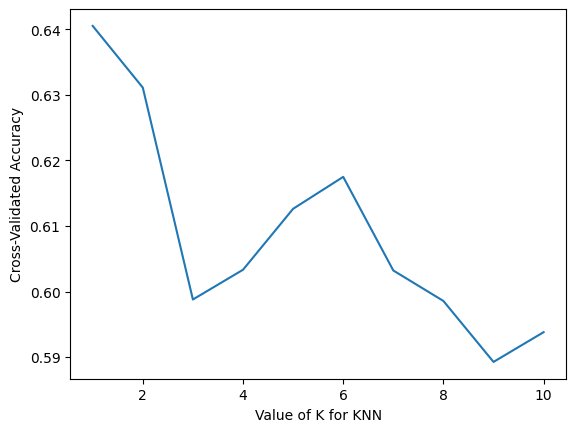

In [20]:
k_range = range(1, 11)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x, y, cv = 5)
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Text(0, 0.5, 'Error Rate')

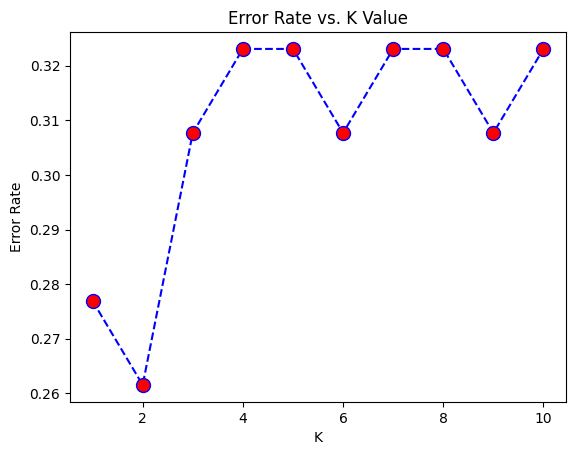

In [32]:
# Error Rate vs K Value
error_rate = []

for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.plot(range(1, 11), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [25]:
knn2 = KNeighborsClassifier(n_neighbors = 2)
knn2.fit(x_train, y_train)
y_pred2 = knn2.predict(x_test)
print(classification_report(y_pred2, y_test))

              precision    recall  f1-score   support

           1       0.95      0.66      0.78        32
           2       0.76      0.84      0.80        19
           3       0.00      0.00      0.00         1
           5       0.50      1.00      0.67         2
           6       0.50      0.50      0.50         2
           7       0.89      0.89      0.89         9

    accuracy                           0.74        65
   macro avg       0.60      0.65      0.61        65
weighted avg       0.85      0.74      0.78        65



K = 2, gives better score